<a href="https://colab.research.google.com/github/willystw/fastai-learning/blob/dog-identification/dog-identification/Dog_Breed_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code below is executed in Google Colab

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.1 MB/s 
     |████████████████████████████████| 186 kB 48.7 MB/s 
     |████████████████████████████████| 1.2 MB 38.7 MB/s 
     |████████████████████████████████| 46 kB 4.5 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 51 kB 339 kB/s 
Mounted at /content/gdrive


In [2]:
#hide
from fastbook import *

In [3]:
# GPU required
torch.cuda.is_available()

True

Install Kaggle

In [4]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 3.3 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=65cc4fa08393c9a0e54f7c2212dcc5fcd11bd08cd435a028f8de87b15dc48398
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


Upload kaggle API Token manually before executing steps below

In [5]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

rm: cannot remove '/root/.kaggle': No such file or directory
ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              233KB  2021-08-29 13:51:53          11392        943  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           6943        523  0.9375           
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2690        200  1.0              
promptcloud/careerbuilder-job

In [6]:
!kaggle competitions download -c dog-breed-identification

 98% 680M/691M [00:03<00:00, 221MB/s]
100% 691M/691M [00:03<00:00, 198MB/s]


In [7]:
!mkdir dog-breed
!unzip dog-breed-identification.zip -d dog-breed

Streaming output truncated to the last 5000 lines.
  inflating: dog-breed/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: dog-breed/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: dog-breed/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: dog-breed/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: dog-breed/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: dog-breed/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: dog-breed/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: dog-breed/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: dog-breed/train/83fad0718581a696132c96c166472627.jpg  
  inflating: dog-breed/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: dog-breed/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: dog-breed/train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: dog-breed/train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: dog-breed/train/840db91ba4600148f3dcb06ec419b421.jpg

In [8]:
df = pd.read_csv('dog-breed/labels.csv')
df

id                     breed
0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

[10222 rows x 2 columns]

In [9]:
def get_x(r): return f"dog-breed/train/{r['id']}.jpg"
def get_y(r): return r['breed']

dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_x = get_x,
    get_y = get_y,
    splitter = RandomSplitter(seed=42),
    item_tfms = Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)

dls = dblock.dataloaders(df)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


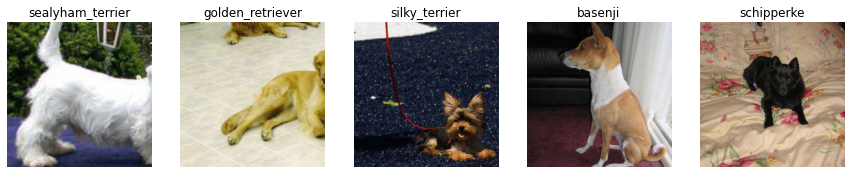

In [10]:
dls.show_batch(nrows=1, ncols=5)

In [11]:
dblock.summary(df)

Setting-up type transforms pipelines
0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

[10222 rows x 2 columns]
Found 10222 items
2 datasets of sizes 8178,2044
Setting up Pipeline: get_x -> PILBase.create
Setting up Pipeline: get_y -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipe

In [12]:
from fastai.callback.fp16 import *
learn = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


SuggestedLRs(valley=0.0006918309954926372)

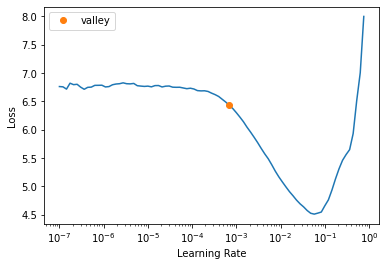

In [13]:
learn.lr_find()

In [14]:
learn.fine_tune(2, base_lr=3e-3)

SuggestedLRs(valley=3.630780702224001e-05)

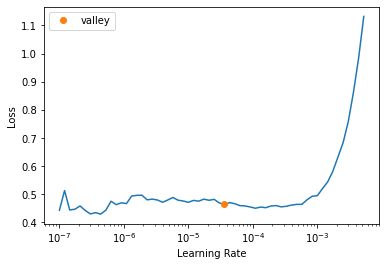

In [15]:
learn.lr_find()

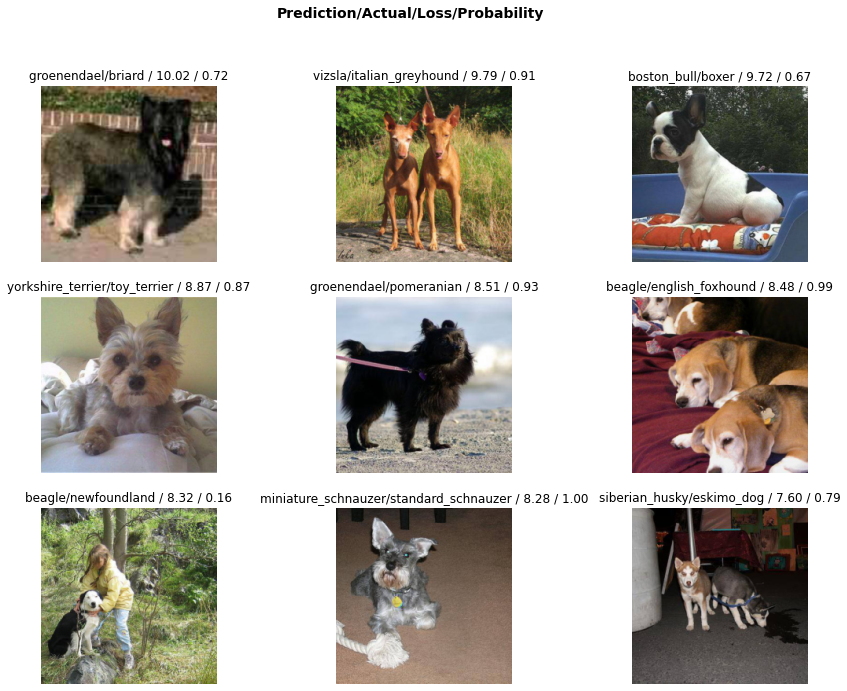

In [16]:
interp = ClassificationInterpretation.from_learner(learn)

interp.plot_top_losses(9, figsize=(15,11))


In [17]:
learn.fine_tune(2, freeze_epochs=1, base_lr=2e-5)

In [53]:
test_df = pd.read_csv('dog-breed/sample_submission.csv')
columns = test_df.columns.values

In [74]:
result_df = pd.DataFrame(columns=columns)
for i in test_df.iloc[:,0]:
  img = tensor(Image.open(f"dog-breed/test/{i}.jpg"))
  x,y,z = learn.predict(img)
  l = [i]
  l.extend(z.tolist())
  result_df.loc[len(result_df)] = l


In [75]:
result_df

id  affenpinscher  afghan_hound  \
0      000621fb3cbb32d8935728e48679680e   4.835312e-07  9.132477e-06   
1      00102ee9d8eb90812350685311fe5890   4.579815e-10  2.534158e-10   
2      0012a730dfa437f5f3613fb75efcd4ce   1.203701e-06  1.162182e-04   
3      001510bc8570bbeee98c8d80c8a95ec1   3.863691e-03  8.720080e-06   
4      001a5f3114548acdefa3d4da05474c2e   2.105882e-03  1.538962e-04   
...                                 ...            ...           ...   
10352  ffeda8623d4eee33c6d1156a2ecbfcf8   5.439559e-07  8.780314e-05   
10353  fff1ec9e6e413275984966f745a313b0   5.279549e-08  9.384280e-08   
10354  fff74b59b758bbbf13a5793182a9bbe4   4.507105e-06  3.946071e-06   
10355  fff7d50d848e8014ac1e9172dc6762a3   2.030794e-04  1.885247e-05   
10356  fffbff22c1f51e3dc80c4bf04089545b   1.293265e-07  9.726920e-06   

       african_hunting_dog      airedale  american_staffordshire_terrier  \
0             1.321901e-07  7.103318e-08                    7.650574e-08   
1             1.753909e-09  4.706772e-10                    2.877192e-10   
2             8.670460e-07  3.579916e-07                    6.145483e-08   
3             5.912719e-05  4.012484e-05                    2.681132e-04   
4             3.849531e-05  7.120917e-06                    1.264492e-05   
...                    ...           ...                             ...   
10352         2.223687e-07  2.481814e-04                    3.658852e-06   
10353         7.560042e-07  1.812404e-07                    3.730279e-06   
10354         3.314801e-04  1.086232e-07                    4.600084e-07   
10355         4.610293e-07  2.385147e-06                    5.380264e-06   
10356         1.591218e-05  1.867046e-07                    9.242547e-08   

        appenzeller  australian_terrier       basenji        basset  \
0      1.174400e-08        1.242417e-07  7.278872e-08  5.398644e-08   
1      1.888394e-08        2.253927e-10  3.929403e-09  1.104018e-09   
2      3.257473e-08        5.887012e-08  3.225335e-09  4.810970e-06   
3      5.582506e-04        1.178007e-05  1.143996e-05  7.052451e-05   
4      1.232606e-06        5.562537e-05  9.563543e-06  7.790306e-06   
...             ...                 ...           ...           ...   
10352  9.792224e-07        9.925540e-08  1.190609e-05  4.994803e-06   
10353  2.980135e-07        1.466078e-08  8.652360e-09  2.511739e-06   
10354  3.641731e-06        8.168565e-07  2.547620e-06  1.380260e-05   
10355  1.967431e-07        1.409229e-05  6.476208e-07  8.579580e-07   
10356  6.365673e-07        5.540578e-08  1.323736e-08  1.258193e-08   

             beagle  bedlington_terrier  bernese_mountain_dog  \
0      3.368502e-08        2.751977e-08          1.386486e-08   
1      5.019652e-09        6.670283e-09          6.447896e-08   
2      1.672148e-07        1.080997e-05          1.739867e-06   
3      2.462382e-05        1.733607e-04          3.237223e-04   
4      3.582031e-05        1.235200e-05          1.541741e-05   
...             ...                 ...                   ...   
10352  1.599556e-06        1.000936e-03          1.397411e-05   
10353  3.594388e-06        2.380745e-05          7.725688e-09   
10354  3.549996e-06        5.671493e-06          8.619303e-07   
10355  2.521679e-06        2.847687e-06          1.415916e-06   
10356  8.014396e-08        6.305693e-05          2.178539e-07   

       black-and-tan_coonhound  blenheim_spaniel    bloodhound      bluetick  \
0                 1.314178e-07      9.350444e-05  6.564062e-07  3.046161e-08   
1                 1.024045e-09      8.678475e-09  1.021895e-10  1.223048e-10   
2                 2.690815e-06      1.404390e-05  4.423426e-06  1.828095e-05   
3                 2.520776e-05      3.635612e-05  2.008375e-03  2.850840e-05   
4                 2.449302e-05      1.469923e-04  4.806929e-05  5.079160e-06   
...                        ...               ...           ...           ...   
10352             1.358391e-05      4.374130e-06  5.229400e-06  8

In [76]:
result_df.to_csv('result.csv')